In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('SoSample3Y.xlsx')

In [4]:
print(df)


    Week Start  Software Bookings
0   2021-08-01         129.808103
1   2021-08-08         122.962071
2   2021-08-15         153.664518
3   2021-08-22         234.772937
4   2021-08-29         214.594944
..         ...                ...
151 2024-06-23         535.647747
152 2024-06-30         255.553305
153 2024-07-07         539.670456
154 2024-07-14         943.907637
155 2024-07-21        2291.493923

[156 rows x 2 columns]


In [5]:
df.head()

,Week Start,Software Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [6]:
df.tail()

,Week Start,Software Bookings
151,2024-06-23,535.647747
152,2024-06-30,255.553305
153,2024-07-07,539.670456
154,2024-07-14,943.907637
155,2024-07-21,2291.493923


In [7]:
df.set_index('Week Start',inplace=True)

In [8]:
df.head()

,Software Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [9]:
df.describe()

,Software Bookings
count,156.000000
mean,308.694304
std,304.876921
min,72.686246
25%,164.056447
50%,213.347536
75%,307.878236
max,2291.493923


In [45]:
#Step 2. Visualize the Data

<Axes: xlabel='Week Start'>

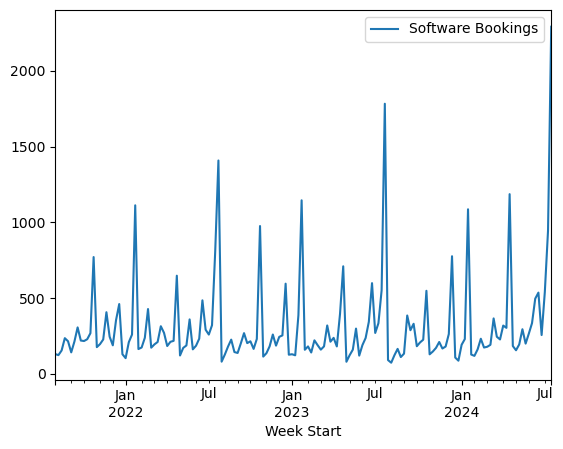

In [10]:
df.plot()

In [11]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [12]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary

def adfuller_test(SoftwareBookings):
    result=adfuller(SoftwareBookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [13]:
adfuller_test(df['Software Bookings'])

ADF Test Statistic:-1.1568022618048963
p-value:0.6918969708384208
#Lags Used:13
Number of Observations Used:142
Weak evidence against null hypo


In [14]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Software Bookings']-df['Software Bookings'].shift(13)

In [15]:
df.head(15)

,Software Bookings,Seasonal First Difference
Week Start,,
2021-08-01,129.808103,NaN
2021-08-08,122.962071,NaN
2021-08-15,153.664518,NaN
2021-08-22,234.772937,NaN
2021-08-29,214.594944,NaN
2021-09-05,141.077460,NaN
2021-09-12,212.493876,NaN
2021-09-19,305.957476,NaN
2021-09-26,219.117424,NaN


In [16]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-1.7732839431853948
p-value:0.3938037976371952
#Lags Used:14
Number of Observations Used:128
Weak evidence against null hypo


In [17]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Software Bookings']-df['Software Bookings'].shift(26)

In [18]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.502431568861996
p-value:0.007924865377975942
#Lags Used:4
Number of Observations Used:125
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

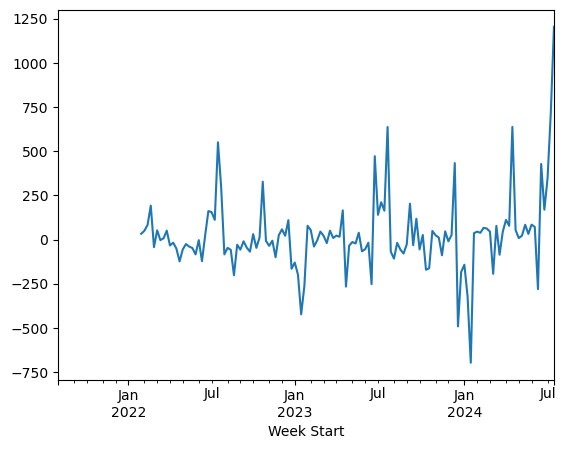

In [19]:
### Now data is stationary as p value is less than .05
df['Seasonal First Difference'].plot()

In [20]:
#### Auto Regressive Model- Autocorrelation and Partial Autocorrelation

### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#### ARIMA has 3 parts- auto regressive (AR model), differencing and moving average
#### AR Model is done with PACF (Partial Autocorrelation)
### p- AR model lags,d- differencing,q- Moving avg lags
### we have 26 NaN so 27th onwards data is coming
# p=1, q= acf better than pacf as no exponentail decrease =0 or 1, d=1 as 1 time it has been shifted
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Software Bookings'],order=(1,1,1),seasonal_order=(1,1,1,26))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [24]:
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44649D+00    |proj g|=  5.53924D-02

At iterate    5    f=  5.39122D+00    |proj g|=  4.66558D-02

At iterate   10    f=  5.38671D+00    |proj g|=  8.42659D-03

At iterate   15    f=  5.29985D+00    |proj g|=  9.29189D-02

At iterate   20    f=  5.26277D+00    |proj g|=  9.13578D-03

At iterate   25    f=  5.23365D+00    |proj g|=  5.10084D-02

At iterate   30    f=  5.22131D+00    |proj g|=  1.34882D-02

At iterate   35    f=  5.22013D+00    |proj g|=  2.00663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: xlabel='Week Start'>

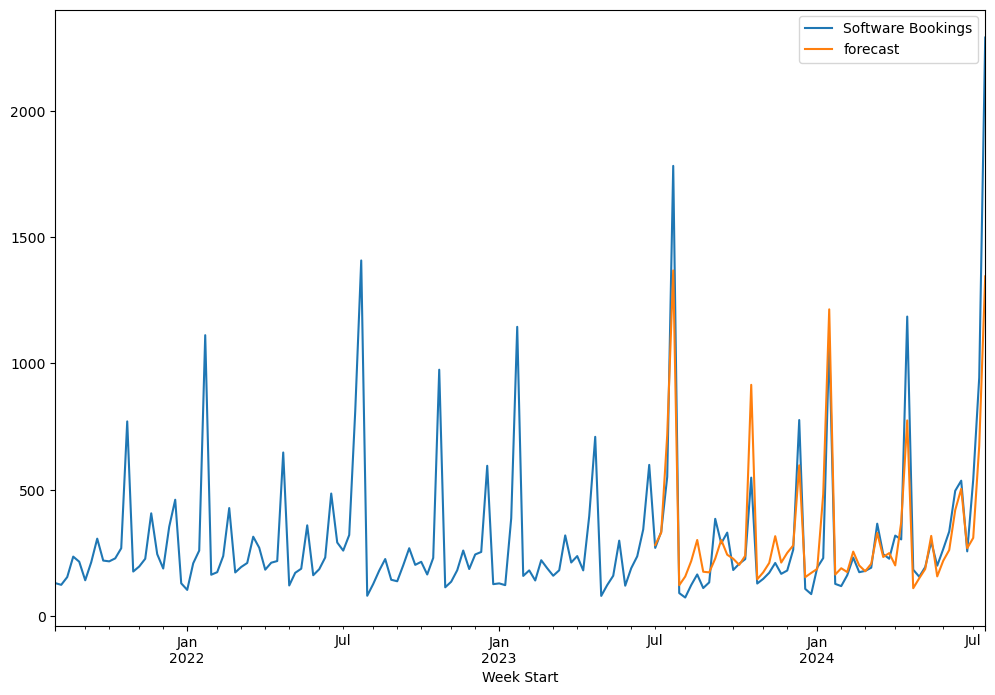

In [25]:
df['forecast']=results.predict(start=100, end = 155, dynamic=True) # testing the model performance with sample input
df[['Software Bookings','forecast']].plot(figsize=(12,8))

In [26]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,53)] # Creating future weeks- 53 weeks placeholder

In [27]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [28]:
future_dataset_df.head()

,Software Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,NaN,NaN,NaN
2024-08-04,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN
2024-08-25,NaN,NaN,NaN


In [29]:
# fill NaN values with float
future_dataset_df['Software Bookings']= future_dataset_df['Software Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Software Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,0.0,0.0,0.0
2024-08-04,0.0,0.0,0.0
2024-08-11,0.0,0.0,0.0
2024-08-18,0.0,0.0,0.0
2024-08-25,0.0,0.0,0.0


In [30]:
# fill NaN values with float for original dataframe
df['Software Bookings']= df['Software Bookings'].fillna(0.0)
df['Seasonal First Difference']= df['Seasonal First Difference'].fillna(0.0)
df['forecast']= df['forecast'].fillna(0.0)
df.head()

,Software Bookings,Seasonal First Difference,forecast
Week Start,,,
2021-08-01,129.808103,0.0,0.0
2021-08-08,122.962071,0.0,0.0
2021-08-15,153.664518,0.0,0.0
2021-08-22,234.772937,0.0,0.0
2021-08-29,214.594944,0.0,0.0


In [32]:
future_df=pd.concat([df,future_dataset_df])

<Axes: xlabel='Week Start'>

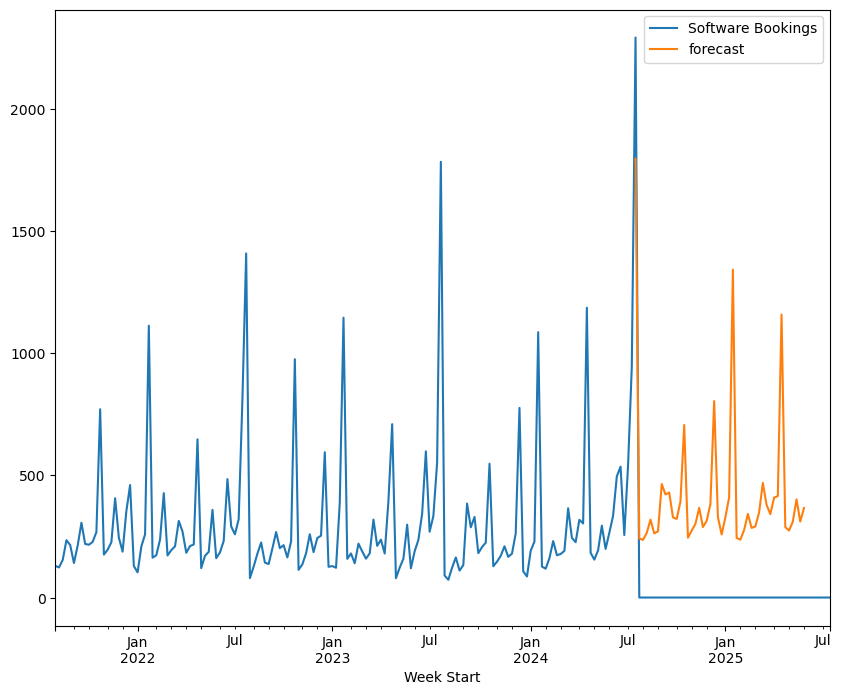

In [33]:
future_df['forecast']=results.predict(start=155, end=200, dynamic=True)
future_df[['Software Bookings','forecast']].plot(figsize=(10,8))

In [34]:
df.head(155)

,Software Bookings,Seasonal First Difference,forecast
Week Start,,,
2021-08-01,129.808103,0.000000,0.000000
2021-08-08,122.962071,0.000000,0.000000
2021-08-15,153.664518,0.000000,0.000000
2021-08-22,234.772937,0.000000,0.000000
2021-08-29,214.594944,0.000000,0.000000
...,...,...,...
2024-06-16,495.616416,-280.287117,419.261665
2024-06-23,535.647747,428.742975,503.370174
2024-06-30,255.553305,169.380486,268.109436


In [35]:
df.iloc[155]

Software Bookings            2291.493923
Seasonal First Difference    1205.576158
forecast                     1345.203898
Name: 2024-07-21 00:00:00, dtype: float64